<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/ML_LAB_CODES/ML_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#function
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


A1. Take any 2 features from your project having has real numeric values. Make a scatter plot of the data and observe the pattern.

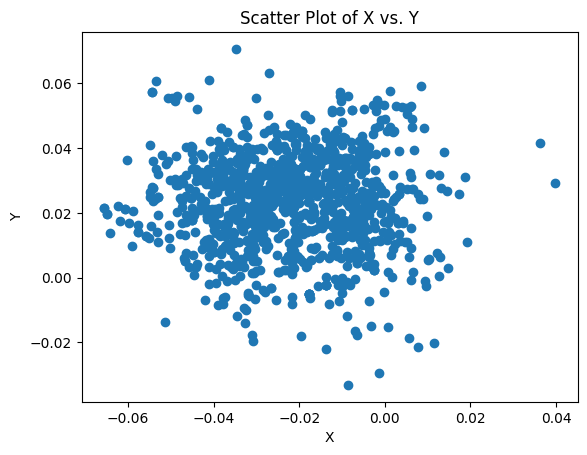

In [27]:
#A1)
data = pd.read_excel('t5_train (1).xlsx')
plt.scatter(data['embed_1'], data['embed_3']) # taking features 1 and 3
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs. Y')
plt.show()

A2. Create a linear regression model on this data. Consider using one feature as independent variable while the other as dependent variable (you may also round this number to integer). After the model is created, calculate the mean square error by predicting the values from the model.

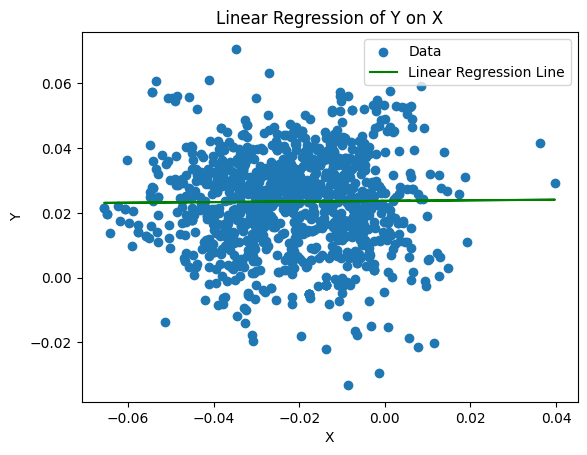

Linear Regression Equation: Y = 0.01X + 0.02
Mean Squared Error: 0.00020918028415692444


In [28]:
#A2)
model = LinearRegression()
X = data[['embed_1']]  # Independent variable
Y = data['embed_3']    # Dependent variable
model.fit(X, Y)

Y_pred = model.predict(X)

# Calculating mean squared error
mse = mean_squared_error(Y, Y_pred)

# Ploting data points and the linear regression line
plt.scatter(X, Y, label='Data')
plt.plot(X, Y_pred, color='green', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression of Y on X')
plt.show()

slope = model.coef_[0]
intercept = model.intercept_

#  the equation of the linear regression line
print(f"Linear Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}") # y =ax+b
print(f"Mean Squared Error: {mse}")

A3. Study all the parameters and attributes associated with linear regression model.

In [29]:
#A3)
mse = mean_squared_error(Y, Y_pred)

# Print the results
print("Coefficients (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)

Coefficients (Slope): 0.00932331048791255
Intercept: 0.02367301387737347
Mean Squared Error: 0.00020918028415692444


A4. Using the training set available for your project, train a logistic regression classifier. Use this classifier to evaluate your test set accuracy. Study the various parameters associated with logistic regression model and the role they play in the model training.

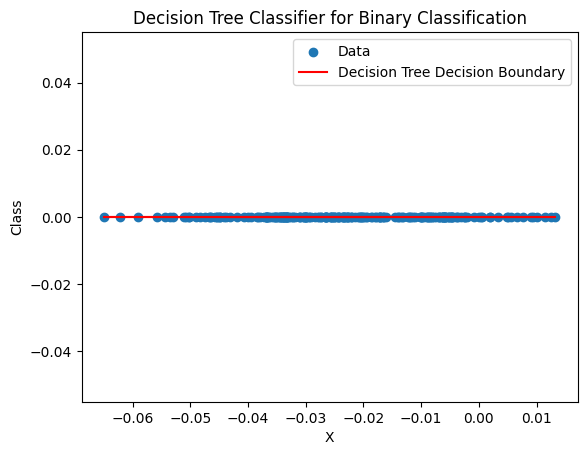

Accuracy: 1.0


In [32]:

threshold = 1

data['binary_class'] = (data['embed_3'] > threshold).astype(int)

# Using a decision tree classifier for binary classification
model = DecisionTreeClassifier(random_state=50)

# Features and target
X = data[['embed_1']].values.reshape(-1, 1)
y = data['binary_class']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Fit the decision tree classifier on the training data
model.fit(X_train, y_train)

# Predict the classes on the x_test
y_pred = model.predict(X_test)

# accuracy of the decision tree based on y test n pred
accuracy = accuracy_score(y_test, y_pred)

plt.scatter(X_test, y_test, label='Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Decision Tree Decision Boundary')
plt.xlabel('X')
plt.ylabel('Class')
plt.legend()
plt.title('Decision Tree Classifier for Binary Classification')
plt.show()


print(f"Accuracy: {accuracy}")


A5. Use a Regression Tree and k-NN Regressor for value prediction. Use the data employed for A1.

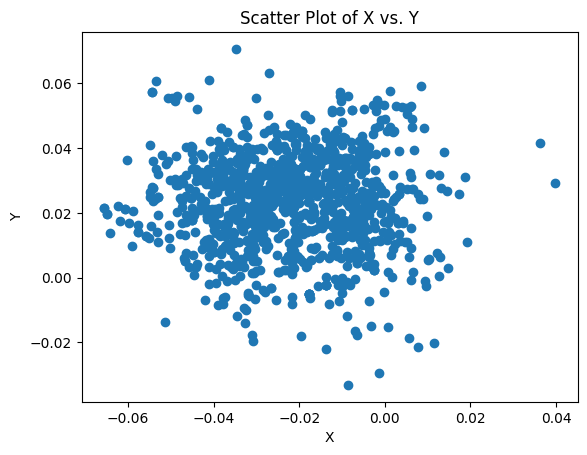

Regression Tree Mean Squared Error: 0.00033194703865898256
k-NN Regressor Mean Squared Error: 0.00022980850212913262


In [31]:
# Scatter plot of X vs. Y
plt.scatter(data['embed_1'], data['embed_3'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs. Y')
plt.show()

# Features and target
X = data[['embed_1']].values
Y = data['embed_3'].values

# Spliting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Regression Tree model
tree_regressor = DecisionTreeRegressor(random_state=50)
tree_regressor.fit(X_train, Y_train)
tree_y_pred = tree_regressor.predict(X_test)
tree_mse = mean_squared_error(Y_test, tree_y_pred)

# k-NN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, Y_train)
knn_y_pred = knn_regressor.predict(X_test)
knn_mse = mean_squared_error(Y_test, knn_y_pred)


print(f"Regression Tree Mean Squared Error: {tree_mse}")
print(f"k-NN Regressor Mean Squared Error: {knn_mse}")
